# CART决策树学习目标：
- 了解基尼指数的计算公式
- 了解基尼指数对于不同特征的计算方式

---

# 1、什么是CART树？
概念：CART树通常指分类和回归树（Classification and Regression Tree）是一种决策树算法用于分类和回归。

基本原理：


# 2、什么是基尼指数？
概念：基尼指数（Gini index）又称为基尼不纯度，是决策树算法中用于数据分割和特征选择的重要指标
公式：

![基尼指数公式](../img/基尼指数公式.png)

`备注：`
- 信息增益（ID3）、信息增益率值越大（C4.5）则说明优先选择该特征
- 记你指数越小（CART）说明优先选择该特征




# 3、CART树分类原理？
全称为"Classification and Regression Trees"，简称CART。这种算法既可以用于分类问题，也可以用于回归问题。CART通过递归地将数据集分割成越来越小的子集，每个子集包含越来越相似的样本，从而构建出一棵树形结构的模型。



In [24]:
# 导入matplotlib颜色映射表模块
from matplotlib.colors import ListedColormap

def decision_tree_boundary(model, axis):
    '''
    根据模型绘制决策树的决策边界
    :param model: 
    :param axis: 
    :return: 
    '''

    # 1、生成等距的数值序列，并将序列压缩到-1到1之间
    dimension1 = np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1)
    dimension2 = np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)

    # 2、生成一个高纬网格
    x0, x1 = np.meshgrid(dimension1, dimension2)

    # 3、将数组水平堆叠（ravel：将多维数组转换为一维数组）
    X_new = np.c_[x0.ravel(), x1.ravel()]

    # 4、模型预测
    y_predict = model.predict(X_new)

    # 5、预测结果重塑
    zz = y_predict.reshape(x0.shape)

    # 6、构造颜色映射表列表
    custom_map = ListedColormap(["#EF9A9A","#FFF59D","#90CAF9"])

    # 7、生成带有颜色填充的等高线
    plt.contourf(x0, x1 ,zz, linewidths=5, cmap=custom_map)
    return None    

/tmp/ipykernel_26899/3180555114.py:32: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1 ,zz, linewidths=5, cmap=custom_map)


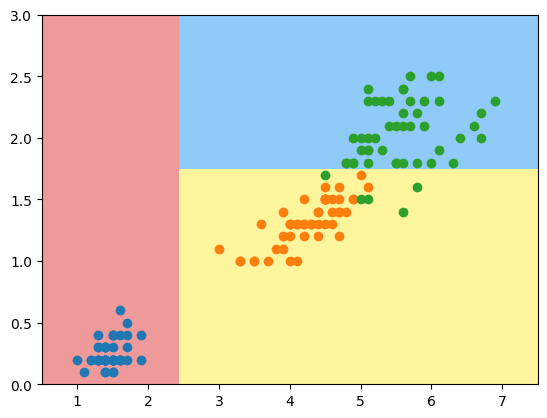

In [25]:
# 导入numpy包
import numpy as np
# 导入matplotlib绘图包
import matplotlib.pyplot as plt
# 导入数据集包
from sklearn import datasets
# 导入决策树包
from sklearn.tree import DecisionTreeClassifier


# 1、导入鸢尾花数据集
iris = datasets.load_iris()
# 特征值数据长度不变，取从第二列数据集
X = iris.data[:, 2:]
y = iris.target


#注意：此处传入的是"gini"而不是"entropy"，默认criterion='gini'
tree = DecisionTreeClassifier(max_depth=2, criterion="gini")
tree.fit(X,y)


decision_tree_boundary(tree,axis=[0.5,7.5,0,3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

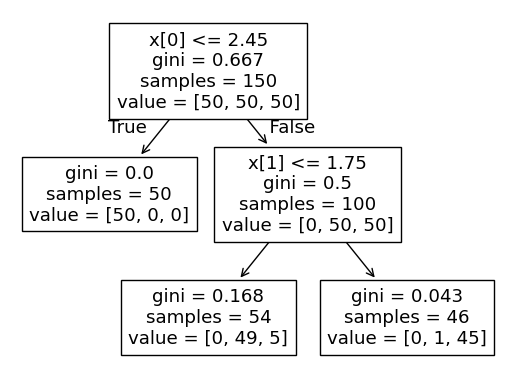

In [28]:
# 树模型可视化

# 导入树模型图形绘制模块
from sklearn.tree import plot_tree
# 导入mat
import matplotlib.pyplot as plt

plot_tree(tree)
plt.show()

# 小结：
- 基尼指数也是一种用于计算模型优先使用那个特征进行树分裂
- 使用基尼指数构建的决策树


In [15]:
import numpy as np

def gini_index(labels):
    """计算给定标签列表的基尼指数"""
    # 如果列表为空，返回0
    if len(labels) == 0:
        return 0
    # 计算每个类别的频率
    _, counts = np.unique(labels, return_counts=True)

    probabilities = counts / counts.sum()
    # 计算基尼指数
    gini = 1 - np.sum(probabilities ** 2)
    return gini


# 计算基尼指数
label_array = ['A', 'B', 'A', 'A', 'B', 'C']
gini = gini_index(label_array)
print(f"基尼指数: {gini:.4f}")

_: ['A' 'B' 'C']
counts: [3 2 1]
基尼指数: 0.6111


In [29]:
def gini_index(labels):
    """
    Calculate the Gini index for a list of labels
    """
    # Count the occurrences of each label
    label_counts = {}
    for label in labels:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1

    # Calculate the Gini index
    gini = 1
    for label in label_counts:
        p_i = label_counts[label] / len(labels)
        gini -= p_i ** 2

    return gini

# 示例使用
labels = ['A', 'B', 'A', 'A', 'B', 'C']
gini = gini_index(labels)
print(f"Gini Index: {gini}")

Gini Index: 0.611111111111111
